데이터 및 코드: https://github.com/datascienceabe/study_open/tree/master/Linear_Regression

출처: Montgomery, D. C., Peck, E. A., & Vining, G. G. (2012). Introduction to linear regression analysis (Vol. 821). John Wiley & Sons.<br>
데이터: http://bcs.wiley.com/he-bcs/Books?action=resource&bcsId=9068&itemId=0470542810&resourceId=36322

3장
목차<br>
1. Multiple Linear Regression
2. Standadized Regression Coefficient
3. Simultaneous Confidence Interval

# 1. Multiple Linear Regression

The Delivery Time data<br>
전국에 음료 자판기를 소유한 유통 업자는 유통 과정을 보면서 원하는 시간에 음료 배달이 오지 않는 문제가 생겼습니다. <br>문제의 원인을 생각하다가 자판기 배달 물량이 많을 수록 배달 시간이 오래 걸리지 않을까 의문이 생겼습니다. <br>
왜나하면 배달 물량이 적재 시간이 오래 걸릴 것이기 때문입니다. <br>
따라서 25개의 소매점을 랜덤으로 방문하여 배달 물량과 배달 시간에 대한 데이터를 수집했습니다.<br>

이제 추가로 운송 거리까지 고려하면 더 정확해지지 않을까 하는 생각이 들었습니다.

In [1]:
setwd('C:/Users/bki19/desktop/Linear_Regression/data')

In [2]:
df2<-read.csv('./Delivery_Time2.csv')

In [3]:
colnames(df2)<-c('Time','Case','Distance')

<b>scatter plot matrix</b><br>
- 데이터 간의 관계를 보는데 유용
- numerical summary보다 좋을 수 있음, response와 regressor들의 관계를 볼 수 있음<br>
- 하지만 x 에대한 y 값이 중복 되는 데이터가 있을 경우 잘 못된 정보를 줄 수도 있음<br>
- dominant한 regressor 존재하고, regressor끼리 nearly linearly independent 할 때 가장 유용함

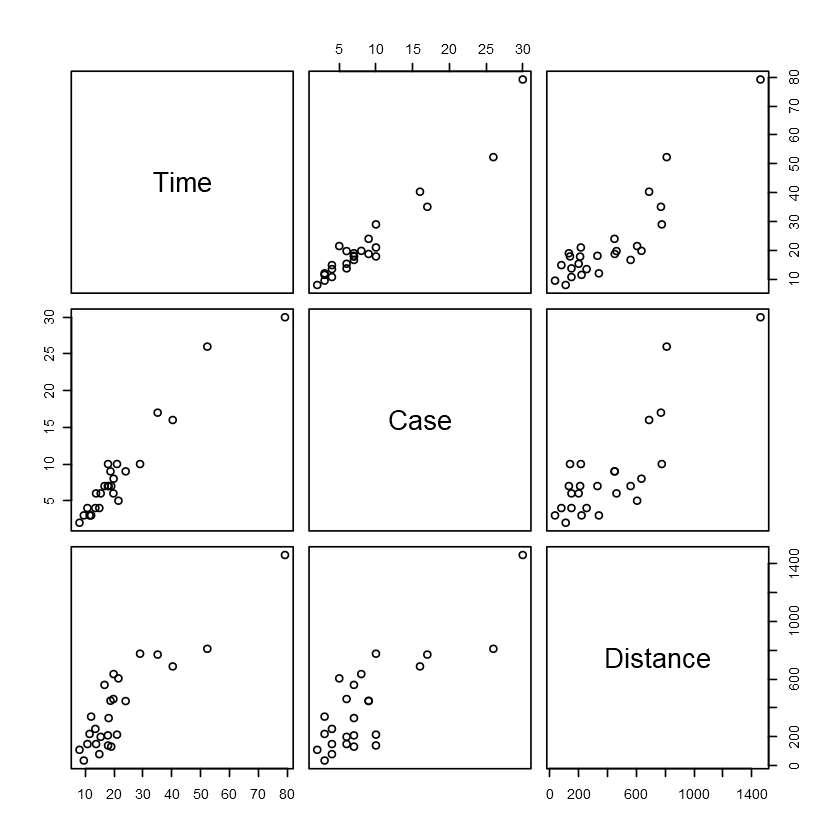

In [4]:
plot(df2)

데이터 간의 선형적 관계가 강해 보입니다

모델 1: $y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}$<br>
모델 2: $y=\beta_{0}+\beta_{1}x_{1}$<br>
데이터를 추가했을 때 모델이 더 좋아지는지, 관련 변수의 회귀 계수가 유의한지를 살펴 보겠습니다

In [9]:
fit<-lm(Time~.,data=df2[,-3])
fit2<-lm(Time~.,data=df2)
fit0 <- lm(Time ~ 1,data=df2)

<b>1) F-test (Anova): Test for Significance of Regression <br></b>
회귀 모형이 유의 한지에 대한 검정<br>
$H_{0}: \beta_{1}=\beta_{2}=0$<br>
$H_{a}: Not H_{0}$<br>
$F_{0}=\frac{MS_{R}}{MS_{Res}}$<br>
Test: $F_{0>F_{\alpha,k,n-k-1}}$

anova 1번의 2번이 SSR로 F가 매우 높아 가설 기각(regressor중 딜리버리 타임과 관련 있는 것 존재)<br>

In [26]:
anova(fit0,fit2)
anova(fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
24,5784.5426,NA,NA,NA,NA
22,233.7317,2,5550.811,261.2351,4.687422e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Case,1,5382.4088,5382.40880,506.61936,1.112549e-16
Distance,1,168.4021,168.40213,15.85085,6.312469e-04
Residuals,22,233.7317,10.62417,NA,NA


In [25]:
sse = sum((fitted(fit2) - mean(df2$Time))^2)
ssr = sum((fitted(fit2) - df2$Time)^2)
sse/2
ssr/22

[1] 2775.405

[1] 10.62417

$MS_{R}=2775.4055$<br>
$MS_{Res}=10.624$<br>
$F_{0}=261.2351$<br>
p-value가 매우 작아 귀무 가설 기각 =>regressor중 딜리버리 타임과 관련 있는 것 존재

<b>2) Partial T-test: Tests on Individual Regression Coefficients <br></b>
$H_{0}: \beta_{j}=0$<br>
$H_{a}: not H_0$<br>
<br>
$T_{0}=\frac{\hat{\beta}_{j}}{se(\hat{\beta}_{j})}$<br>
Test: $|t_{0}|>t_{\alpha/2,n-k-1}$이면 Reject Null


In [27]:
summary(fit2)


Call:
lm(formula = Time ~ ., data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7880 -0.6629  0.4364  1.1566  7.4197 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.341231   1.096730   2.135 0.044170 *  
Case        1.615907   0.170735   9.464 3.25e-09 ***
Distance    0.014385   0.003613   3.981 0.000631 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.259 on 22 degrees of freedom
Multiple R-squared:  0.9596,	Adjusted R-squared:  0.9559 
F-statistic: 261.2 on 2 and 22 DF,  p-value: 4.687e-16


Distance 회귀 계수 유의: Case 변수가 주어졌을 때 Distance는 모형에 기여함<br>
다른 모든 회귀 계수 유의

<b> 3) Partial F-test: Extra-sum-of-squares method <br></b>
-subset의 기여도를 보고 싶을 때<br>

$H_{0}:\beta_{2}=0$<br>

In [28]:
anova(fit2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Case,1,5382.4088,5382.40880,506.61936,1.112549e-16
Distance,1,168.4021,168.40213,15.85085,6.312469e-04
Residuals,22,233.7317,10.62417,NA,NA


$SS_{R}(\beta_{1}|\beta_{0})=5382.4077$<br>
$SS_{R}(\beta_{2}|\beta_{1},\beta_{0})=168.4078$<br>
$F_{0}= \frac{SS_{R}(\beta_{2}|\beta_{1},\beta_{0})/1}{MS_{Res}} =15.85$로 reject H0 : Distance가 모형에 유의하게 기여

<b>4) adj R2 </b><br>

$R_{adj}^{2}=1-\frac{MS_{Res}}{MS_{T}  }$

$R^2$는 변수 추가하면 절대 감소 안함 <br>
$R_{adj}^{2}$는 변수를 추가할 때 MSres를 감소시키면 증가<br>

In [29]:
summary(fit)$r.squared 
summary(fit2)$r.squared 

[1] 0.9304813

[1] 0.9595937

모델1: $R^{2}=0.9595,R_{adj}^{2}=0.9559$,MS_{res}=10.6242<br>
모델1: $R^{2}=0.9305,R_{adj}^{2}=0.9275$,MS_{res}=17.4848<br>
- $R^2$는 0.96으로 변수 하나일 때(0.93) 보다 높아짐
- $R_{adj}^{2}$ 역시 증가했고 이는 MS_{res}를 감소 시켰기 때문<br>


<b>5) CI for Coefficient <br></b>

$\hat{\beta}_{j}- t_{\alpha/2,n-2}\sqrt{\hat{\sigma}^{2}C_{jj}}   <\beta_{j}<\hat{\beta}_{j}+ t_{\alpha/2,n-2}\sqrt{\hat{\sigma}^{2}C_{jj}} $<br>
여기서 $C_{jj}$는 $(\mathbf{XX})^{-1}$의 diagonal element

In [32]:
confint(fit2)

,2.5 %,97.5 %
(Intercept),0.066751987,4.61571030
Case,1.261824662,1.96998976
Distance,0.006891745,0.02187791


<b>6) CI estimation of the mean response</b>

$\hat{E(y|x_{0})}-t_{\alpha/2,n-2}\sqrt{\hat{\sigma}^{2}\mathbf{x}_{0}^{T}(\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{x}_{0}} <E(y|x_{0})<\hat{E(y|x_{0})}+t_{\alpha/2,n-2}\sqrt{\hat{\sigma}^{2}\mathbf{x}_{0}^{T}(\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{x}_{0}} $

In [33]:
mean_response <- predict(fit2, newdata=data.frame(Case=8,Distance=275), interval="confidence", level=0.95)
mean_response 

,fit,lwr,upr
1,19.22432,17.6539,20.79474


<b> 7) Prediction Interval</b>

$\hat{E(y|x_{0})}-t_{\alpha/2,n-2}\sqrt{\hat{\sigma}^{2}(1+\mathbf{x}_{0}^{T}(\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{x}_{0}}) <E(y|x_{0})<\hat{E(y|x_{0})}+t_{\alpha/2,n-2}\sqrt{\hat{\sigma}^{2}(1+\mathbf{x}_{0}^{T}(\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{x}_{0}}) $

In [34]:
mean_response <- predict(fit2, newdata=data.frame(Case=8,Distance=275), interval='prediction', level=0.95)
mean_response

,fit,lwr,upr
1,19.22432,12.28456,26.16407


# <b>2. Standadized Regression <br></b>

Regressor끼리 단위가 다르면 coefficient를 비교하기가 어려움

1) Unit Normal Scaling<br>
$z_{ij}= \frac{x_{ij}-\bar{x}_{j} }{s_{j}}, i=1,2,3..,n$  $ j=1,,,k $<br>
$y_{ij}= \frac{y_{ij}-\bar{y}_{j} }{s_y}, i=1,2,3..,n$




2) Unit Length Scaling<br>
$w_{ij}= \frac{x_{ij}-\bar{x}_{j} }{s_{jj}^{1/2}}, i=1,2,3..,n$  $ j=1,,,k $<br>
$y_{ij}= \frac{y_{ij}-\bar{y}_{j} }{SS_{T}^{1/2}}, i=1,2,3..,n$<br>
결국 둘다 coeffecient의 추정 값은 같아짐


In [35]:
df3<-data.frame(Time=scale(df2$Time),Case=scale(df2$Case), Distance=scale(df2$Distance))

In [36]:
fit_stand<-lm(Time~.,data=df3)
summary(fit_stand)


Call:
lm(formula = Time ~ ., data = df3)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37282 -0.04270  0.02811  0.07450  0.47792 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.188e-17  4.199e-02   0.000 1.000000    
Case         7.163e-01  7.568e-02   9.464 3.25e-09 ***
Distance     3.013e-01  7.568e-02   3.981 0.000631 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.21 on 22 degrees of freedom
Multiple R-squared:  0.9596,	Adjusted R-squared:  0.9559 
F-statistic: 261.2 on 2 and 22 DF,  p-value: 4.687e-16


Case의 표준화된 값이 한 단위 증가하면 표준화된 response도 한 단위 증가한다<br>
Case가 Distance 보다 커서 더 중요해 보이지만 다른 샘플이 들어와서 범위가 달라지면 이러한 상대적인 비교 결과가 달라질 수 있음

# <b>3. Simultaneous C.I <br></b>

구간을 추정할 때 전체 coefficient에 동시에 적용할 수 있는 CI는 없을까?<br>
만약 $\beta_{0}$,$\beta_{1}$의 CI를 동시에 만들고 둘이 독립이면 둘 다 동시에 CI에 포함될 확률은 $0.95^{2}=0.9025$

<b>1) Bonferroni method:</b><br>
$\hat{\beta}_{j}\pm t_{\alpha/2p,n-p}se(\hat{\beta}_{j})$=> $1-\alpha$ 대신 $1-\alpha/p$ 사용<br>
<b>2) Scheffe:</b><br>
$\hat{\beta}_{j}\pm (2 F_{\alpha,p,n-p})se(\hat{\beta}_{j})$<br>
<b>3) Maximum modulus t procedure</b><br>
신뢰 구간의 길이: Maximum modulus<Bonferroni< Scheffe 

In [39]:
df<-read.csv('./Rocket_Prop.csv')
df<-df[,c(2,3)]
colnames(df)<-c('Shear_length','Age_Propellant')
fit<-lm(Shear_length~Age_Propellant,data=df)
a=0.05
confint(fit, level = (1-a/2))

,1.25 %,98.75 %
(Intercept),2519.79245,2735.85227
Age_Propellant,-44.21747,-30.08971


Bonferroni<br>
$\beta_{0}$,$\beta_{1}$에 대한 95% 신뢰 구간을 각각 세웠을 때<br>
90%의 확신으로 $\beta_{0}$,$\beta_{1}$를 포함할 신뢰 구간은 위와 같음

# Model Adequacy Checking

<가정><br>
1.y와 x의 관계가 근사하게 linear<br>
2.error의 기댓값 0<br>
3.error의 variance constant<br>
4.error는 상관관계 없음<br>
5.error는 normal 분포<br>

In [26]:
PRESS <- function(linear.model) {
    pr <- residuals(linear.model)/(1 - lm.influence(linear.model)$hat)
    return (pr)
}

In [27]:
Resid<-data.frame(residual=resid(fit2), stardardized=rstandard(fit2) *(1-lm.influence(fit2)$hat)^0.5,in_studentized=rstandard(fit2),hat=lm.influence(fit2)$hat,PRESS=PRESS(fit2),ex_studentized=rstudent(fit2)   )
Resid

residual,stardardized,in_studentized,hat,PRESS,ex_studentized
-5.0280843,-1.54260631,-1.62767993,0.10180178,-5.59796734,-1.69562881
1.1463854,0.35170879,0.36484267,0.07070164,1.23360321,0.35753764
-0.0497937,-0.01527661,-0.01609165,0.09873476,-0.05524867,-0.01572177
4.9243539,1.51078203,1.57972040,0.08537479,5.38401290,1.63916491
-0.4443983,-0.13634053,-0.14176094,0.07501050,-0.48043610,-0.13856493
-0.2895743,-0.08884082,-0.09080847,0.04286693,-0.30254339,-0.08873728
0.8446235,0.25912883,0.27042496,0.08179867,0.91986749,0.26464769
1.1566049,0.35484408,0.36672118,0.06372559,1.23532680,0.35938983
7.4197062,2.27635117,3.21376278,0.49829216,14.78889824,4.31078012
2.3764129,0.72907878,0.81325432,0.19629595,2.95682585,0.80677584


residual9=7.4197로 커보임<br>
standardized로 봐도 다른거는 +-2안에 있는데 이거는 밖에 있음 <br>
internally studentized로 보면 3.2138로 확연히 큼 <br>
모형이 이 점에 대해 fit이 잘 안됨을 알 수 있음

In [28]:
df2[9,]

,Time,Case,Distance
9,79.24,30,1460


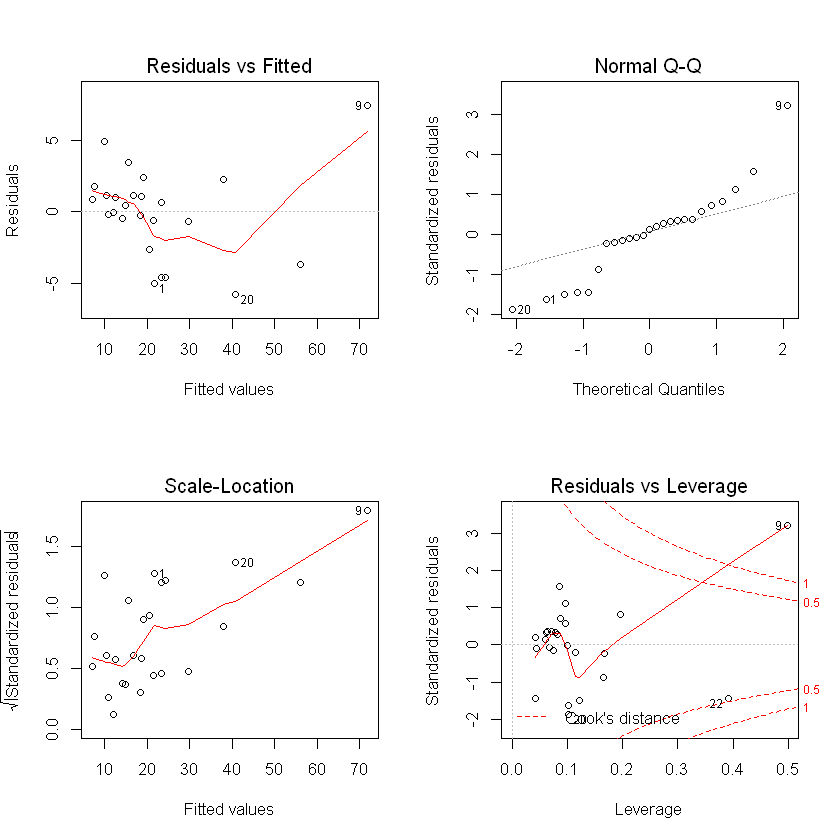

In [29]:
par(mfrow=c(2,2))
plot(fit2)

Normality: plot을 보면 직선에 놓여 있지 않음(꼬리가 너무 두꺼워 보임) -> 한 개 이상의 아웃라이어 있을 듯<br>
Residual vs Fitted value: Misspecification of regressor( transformation 필요?) 없어 보임, inequality of variance 없어 보임<br>

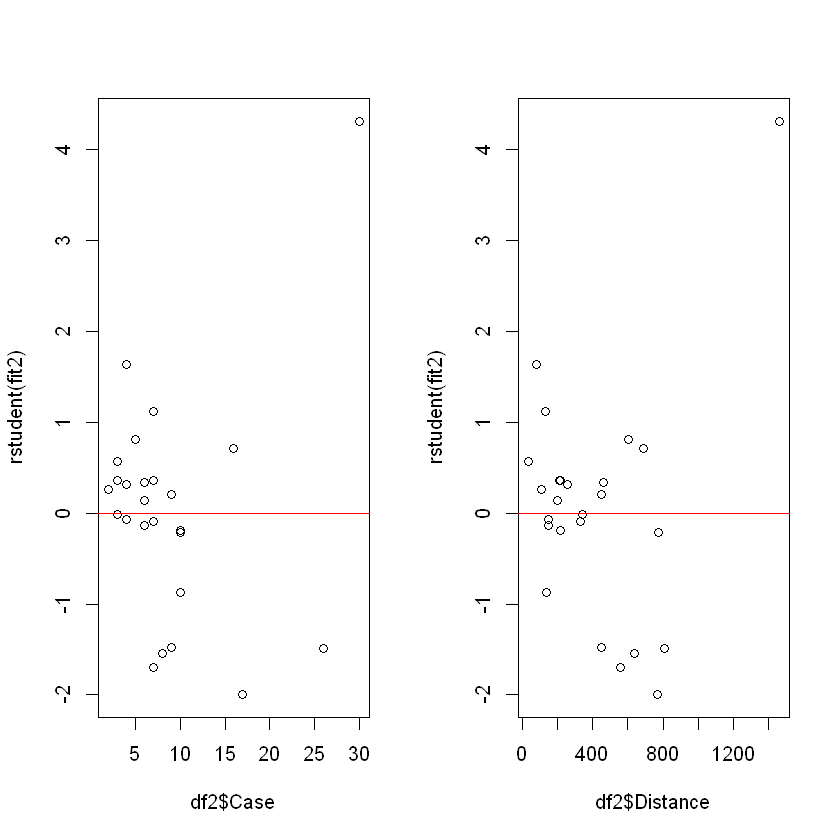

In [30]:
par(mfrow=c(1,2))
plot(df2$Case,rstudent(fit2) );abline(h=0, col="red")
plot(df2$Distance,rstudent(fit2) );abline(h=0, col="red")

regressor와 residual의 관계를 plotting 하는 것은 transformation의 필요성을 항상 볼 수 있는 것은 아님<br>
Omitted variable과 residual의 관계를 보면 potentially include 할지 볼 수 있음<br>
interation effect는 못봄<br>
Multicollinearity가 강하면 잘 못 된 관계를 보여 줄 수 있음

<b>Partial Regression Plot <br></b>
다른 regressor가 주어졌을 때, marginal relationship을 볼 수 있음<br>
이 관계를 보고 transformation을 판단

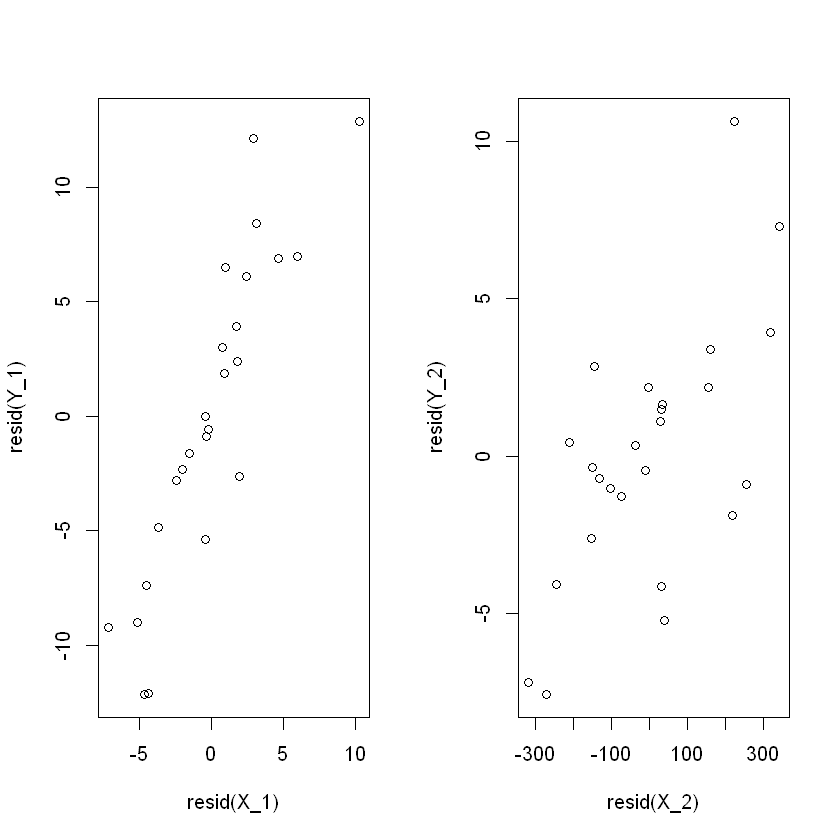

In [31]:
Y_1<-lm(Time~Distance,data=df2)
X_1<-lm(Case~Distance,data=df2)
Y_2<-lm(Time~Case,data=df2)
X_2<-lm(Distance~Case,data=df2)

par(mfrow=c(1,2))
plot( resid(X_1),resid(Y_1) )
plot( resid(X_2),resid(Y_2) )

두 변수다 linear relationship이 명백

<b>PRESS STATISTICS <br></b>

In [32]:
233.7317
sum( PRESS(fit2)^2)

[1] 233.7317

[1] 459.0393

SSres에 비해 PRESS STAT이 2배가 넘음 -> 절반이 넘는 PRESS STAT이 point 9에 기여했기 때문<br>
이 모델이 extrapolation에 취약함을 알 수 있음<br>
PRESS STAT은 모델 간 비교에도 사용 가능

In [33]:
1-(sum( PRESS(fit2)^2)/5784.5426)

[1] 0.9206438

이 모델이 새로운 관측치를 예측하는데 있어 92.09%의 변동성을 설명할 수 있고, 원래 데이터에서는 95.96% 설명 가능<br>
좋아 보이지만 점 9는 잘 예측 못했다는 것을 기억해야 됨

<b>Lack of Fit <br></b>

Systematic lack of fit이 존재하는지 판단: Quadratic term을 추가할지, 혹은 다른 regressor를 추가해야 되는지<br>
Replicated observation 필요<br>
H0: E[yi]=B0+B1xi<br>
H1: not H0<br>
Reject H0면, 더 적합한 모형을 찾아야 됨

In [35]:
df_lack<-read.csv('./ex4.8.csv')

In [36]:
fit_lack<-lm(y~x,data=df_lack)

In [37]:
summary(fit_lack)


Call:
lm(formula = y ~ x, data = df_lack)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4536 -1.6158  0.5638  2.6358  7.4246 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.2139     2.6649   4.959 0.000172 ***
x             2.1304     0.5645   3.774 0.001839 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.084 on 15 degrees of freedom
Multiple R-squared:  0.487,	Adjusted R-squared:  0.4528 
F-statistic: 14.24 on 1 and 15 DF,  p-value: 0.001839


In [38]:
anova(fit_lack)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x,1,237.4788,237.47877,14.2411,0.001839409
Residuals,15,250.1338,16.67559,NA,NA


# Leverage and Influence 

In [39]:
p=dim(df2)[2]
n<-dim(df2)[1]
Criterion=2*p/n #h_ii가 Criterion 보다 크면 leverage point로
hii<-lm.influence(fit2)$hat

In [40]:
OUTLIERS<-rep(NA,n)
for (i in 1:n){
    if (hii[i]>Criterion){
        OUTLIERS[i]<-i
    }
}

In [41]:
na.omit(OUTLIERS) #Criterion 보다 큰 hii

[1]  9 22
attr(,"na.action")
 [1]  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 23 24 25
attr(,"class")
[1] "omit"

hat element로 봤을 때 포인트 9,22가 leverage point이다.<br>
위에서 internally나 externally studentized residual은 22에 대해 별로 크지 않았어서 influential point 아닐 것이다<br>
하지만 포인트 9에 대해서는 커서 influential 가능성 높다.


In [42]:
coef(lm(Time~.,data=df2)) #9,22 in
coef(lm(Time~.,data=df2[-9,])) #22 in
coef(lm(Time~.,data=df2[-22,])) #9 in
coef(lm(Time~.,data=df2[-c(9,22),])) #no


(Intercept)        Case    Distance 
 2.34123115  1.61590721  0.01438483

(Intercept)        Case    Distance 
 4.44723773  1.49769128  0.01032406

(Intercept)        Case    Distance 
 1.91574039  1.78632361  0.01236911

(Intercept)        Case    Distance 
 4.64269200  1.45560675  0.01054938

9번을 지웠을 때 b1은 28%정도 변화하지만 b2는 90퍼센트나 변화한다.<br>
이것은 x2의 9번 값이 매우 크기 때문일 듯

In [45]:
#install.packages("car", repos='http://cran.us.r-project.org')
library(car)

Warning message:
"package 'car' was built under R version 3.5.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.5.2"

In [46]:
cooks.distance(fit2)

1            2            3            4            5            6 
1.000921e-01 3.375704e-03 9.455785e-06 7.764718e-02 5.432217e-04 1.231067e-04 
           7            8            9           10           11           12 
2.171604e-03 3.051135e-03 3.419318e+00 5.384516e-02 1.619975e-02 1.596392e-03 
          13           14           15           16           17           18 
2.294737e-03 3.292786e-03 6.319880e-04 3.289086e-03 4.013419e-04 4.397807e-02 
          19           20           21           22           23           24 
1.191868e-02 1.324449e-01 5.086063e-02 4.510455e-01 2.989892e-02 1.023224e-01 
          25 
1.084694e-04

In [47]:
which.max(cooks.distance(fit2))

9 
9

Cook's distance로 봤을 때 가장 높은 것은 9번째 값으로 이 값을 지우면 LSE 추정값이 coefficient의 96% CI의 경계에서 벗어날 것이라는 것을 의미한다<br>
두번째로 높은 22를 지우면 값을 지우면 LSE 추정값이 coefficient의 35% CI의 경계에서 벗어날 것이라는 것을 의미한다.<br>
이것으로 보아 9번은 influential but 22 is not
